1. Ислледуемый датасет.

Пищевая ценность продуктов (Food Nutritional Facts).

https://www.kaggle.com/datasets/beridzeg45/food-nutritional-facts

2. Краткое описание.

Предметная область - продукты питания (фрукты, овощи, мясо, рыба, орехи и др.).
Источник данных - научные интернет-ресурсы по питанию, медицине и здоровью.
Характер данных - реальные данные.

В датасете представлены строковые (название продукта и категория) и числовые (количество вещества в продукте) данные.

Задача анализа - изучить уровень содержания микроэлементов в продуктах, а также выяснить, какие продукты более предпочтительны для добавления в свой рацион питания.

Подключим библиотеки:
* pandas - для обработки и анализа данных;
* matplotlib - для визуализации данных двухмерной графикой.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'foodstruct_nutritional_facts.csv'
data = pd.read_csv(file_path)

3. Анализ атрибутов.

Пропущенные значения есть. Правильно было бы обозначить их за 0 (0г/100г).
Выбросы есть. Выбросами являются микронутриенты с резко высоким содержанием вещества.

Гистограмма распределения выбросов, среднее значение, СКО:

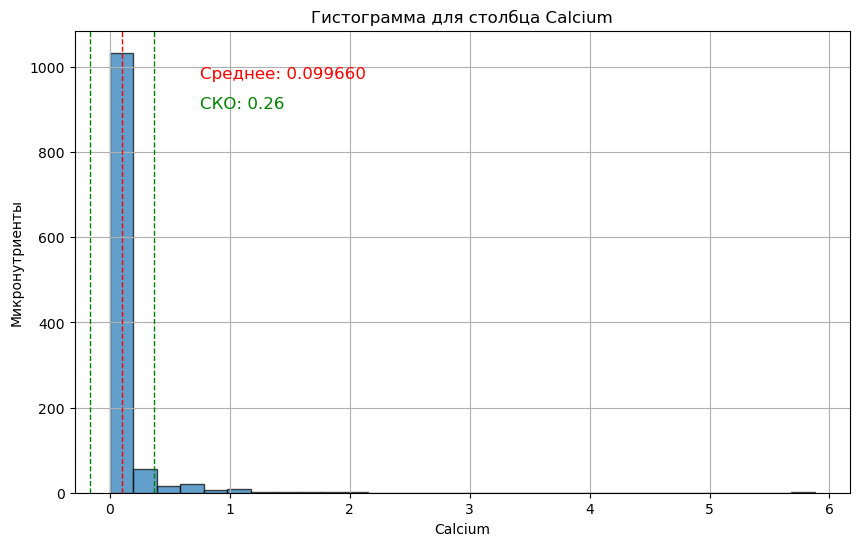

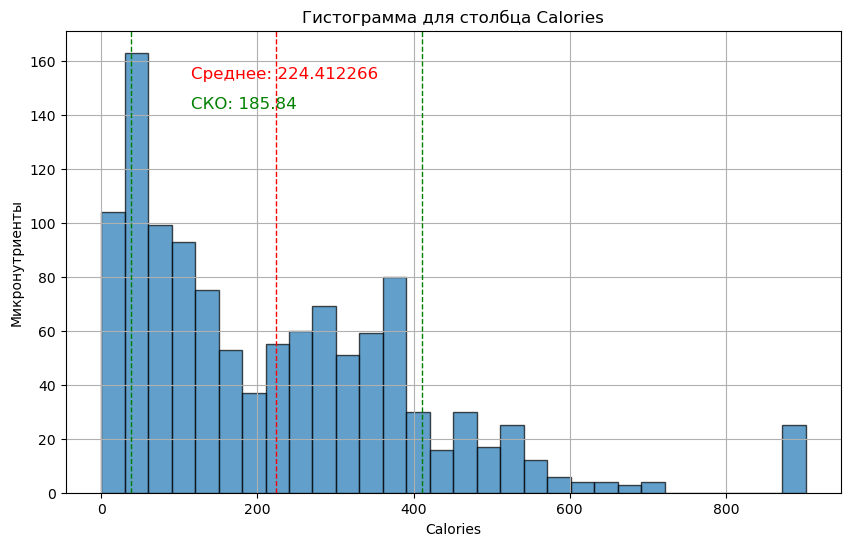

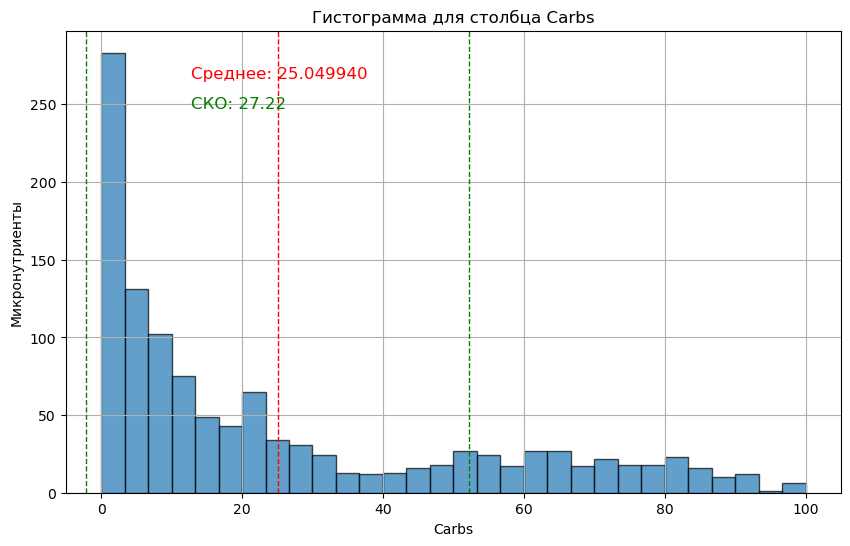

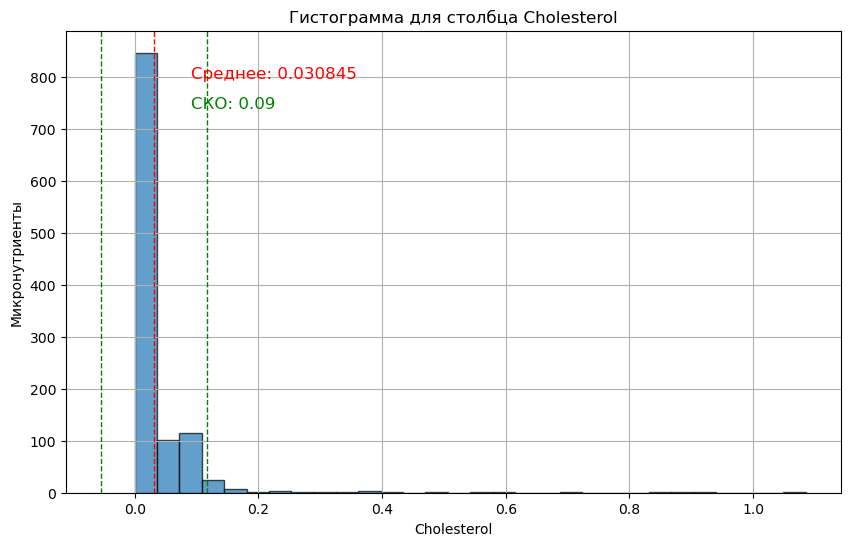

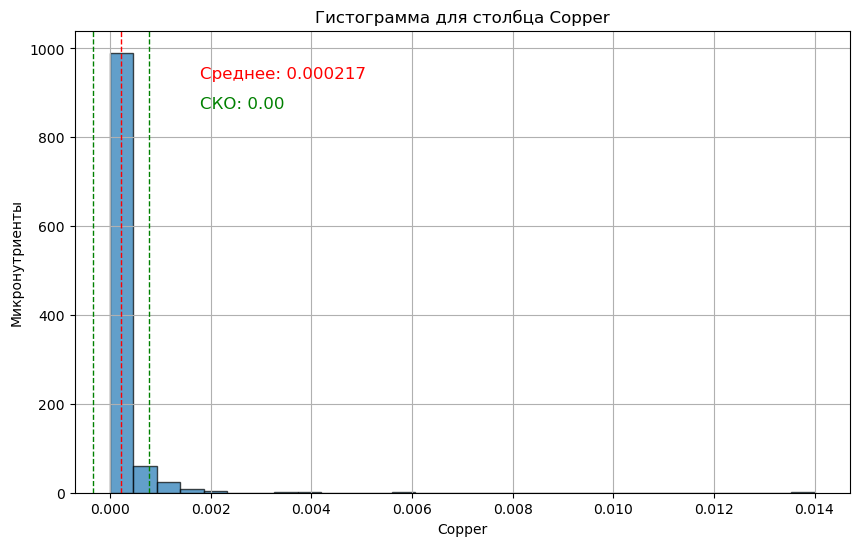

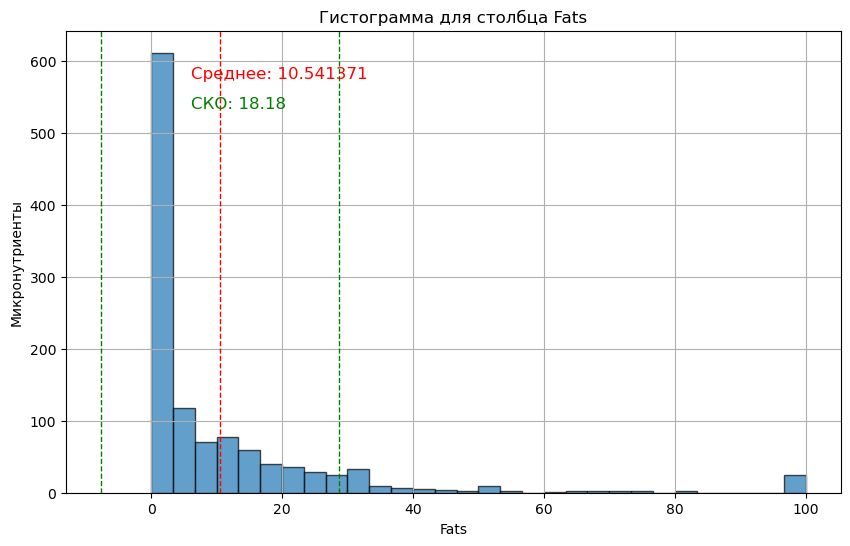

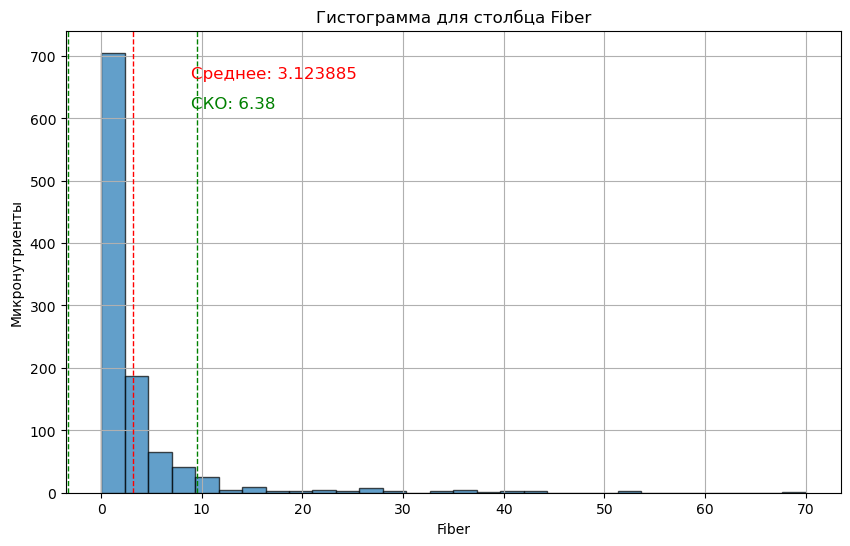

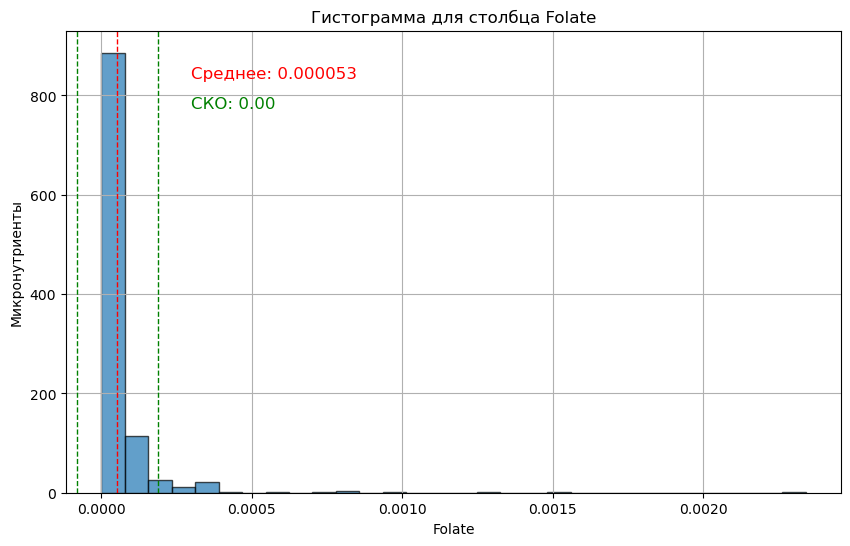

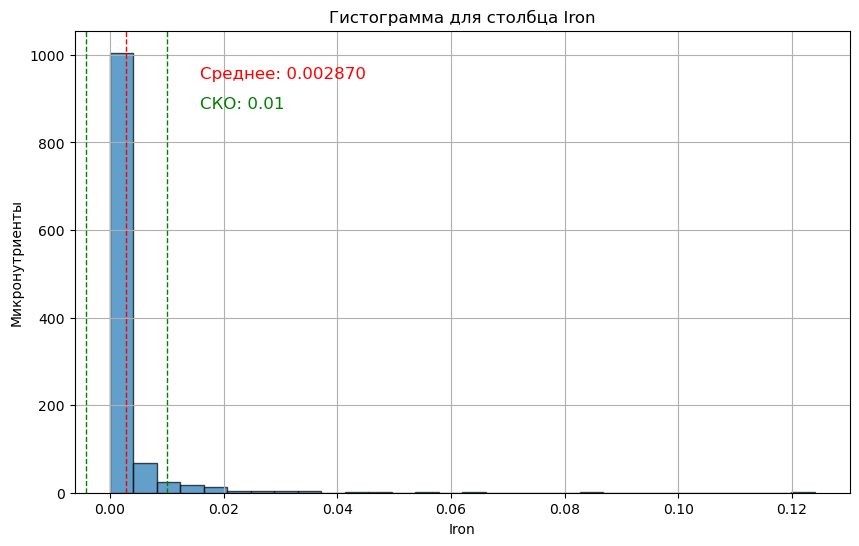

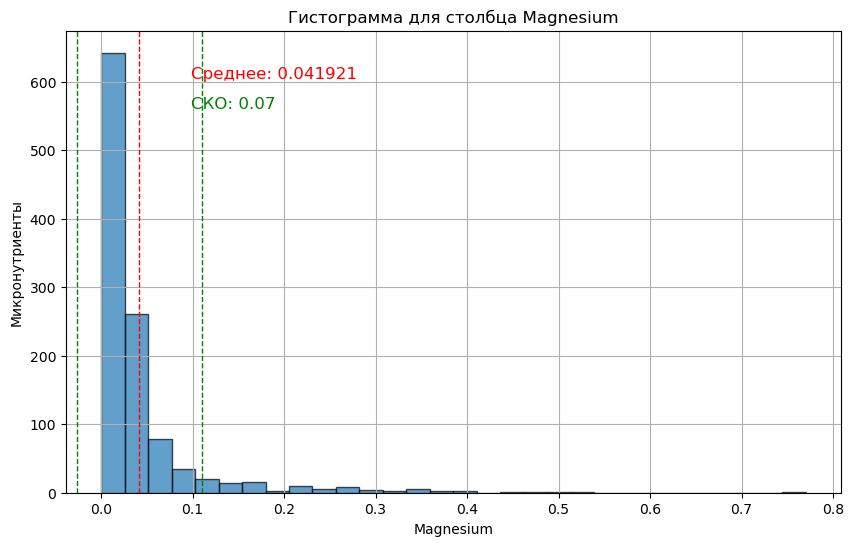

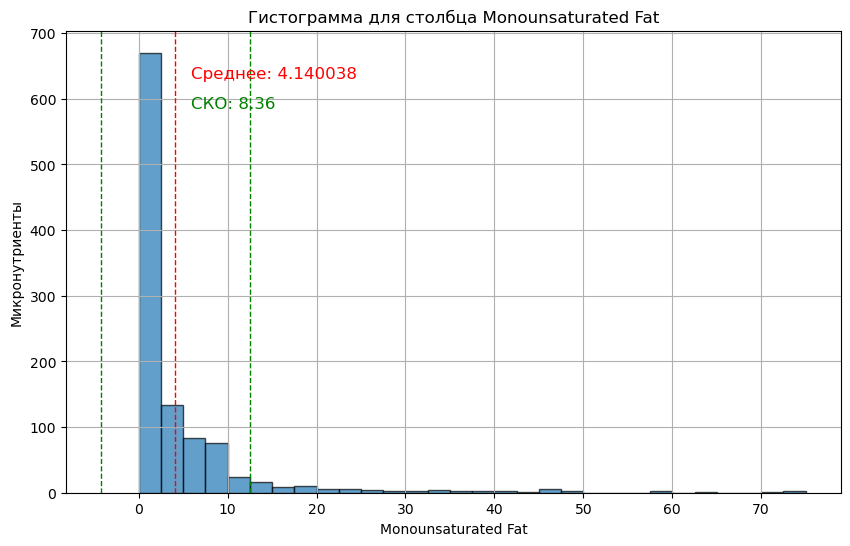

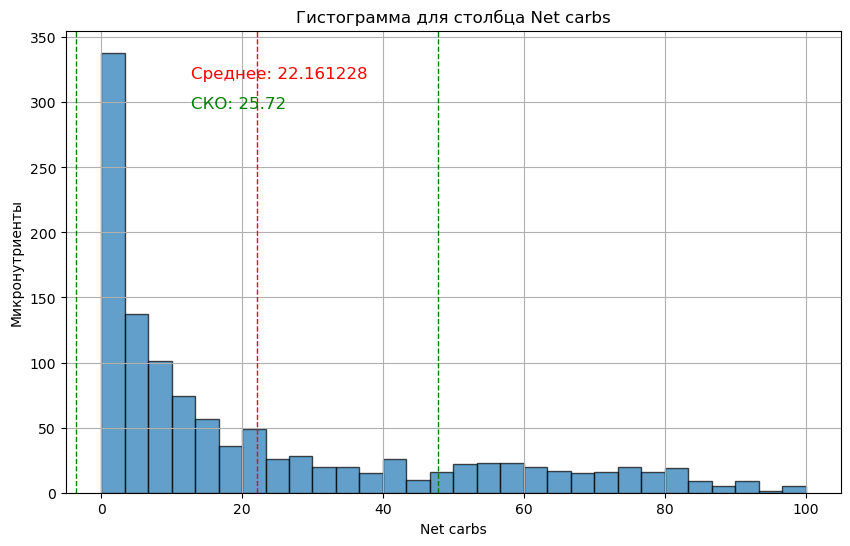

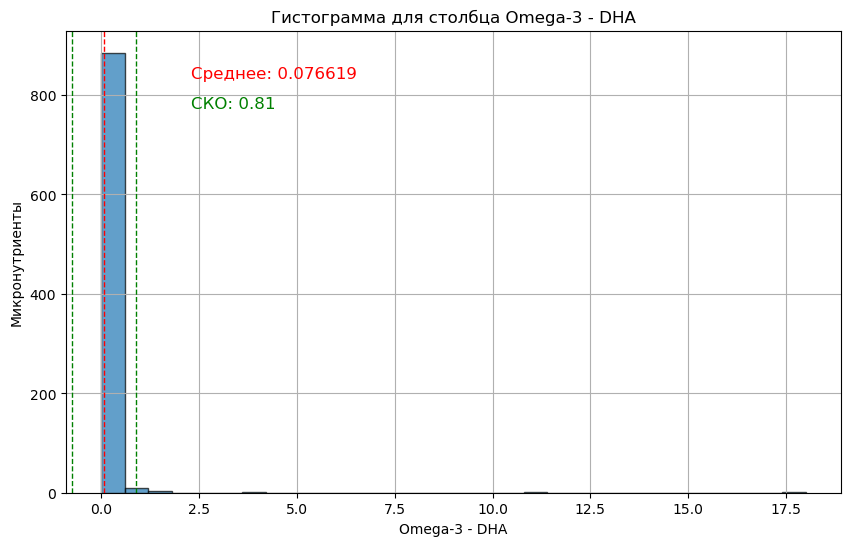

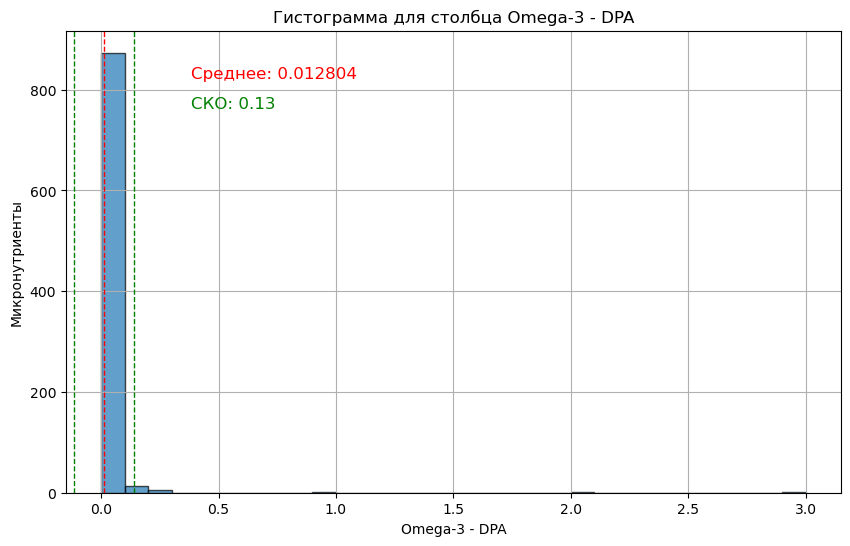

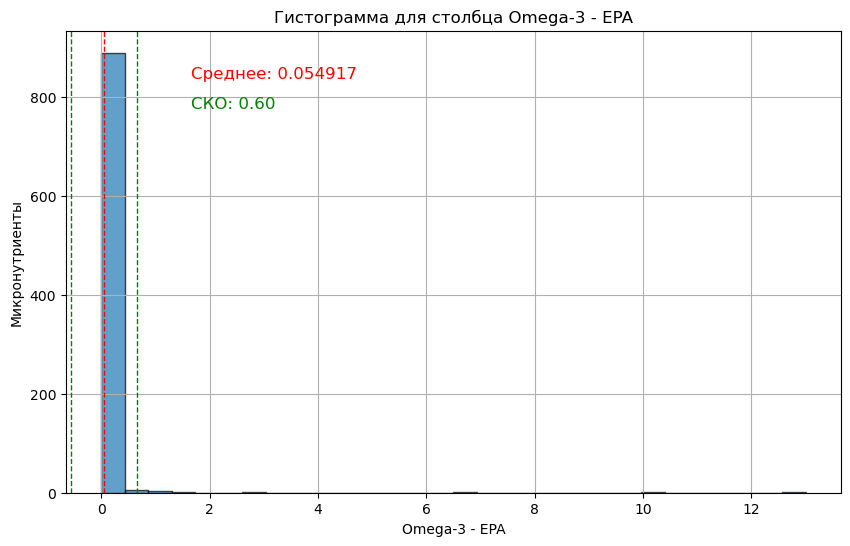

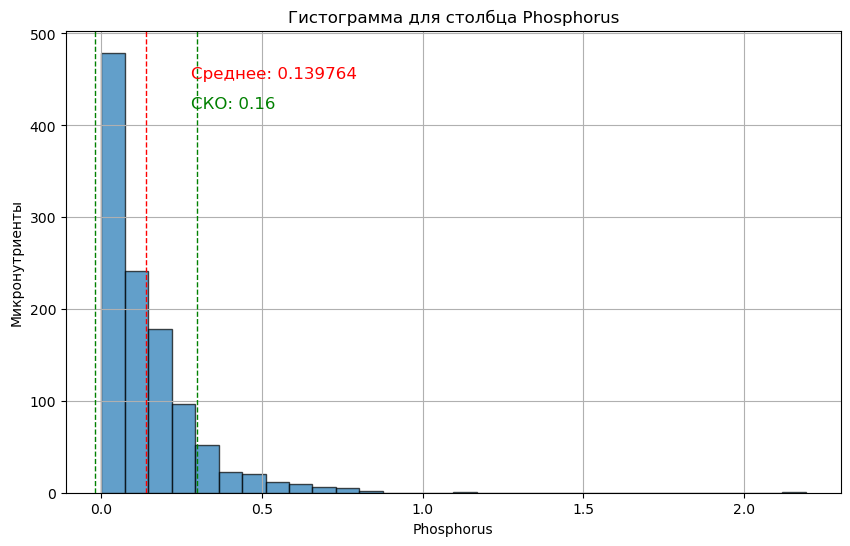

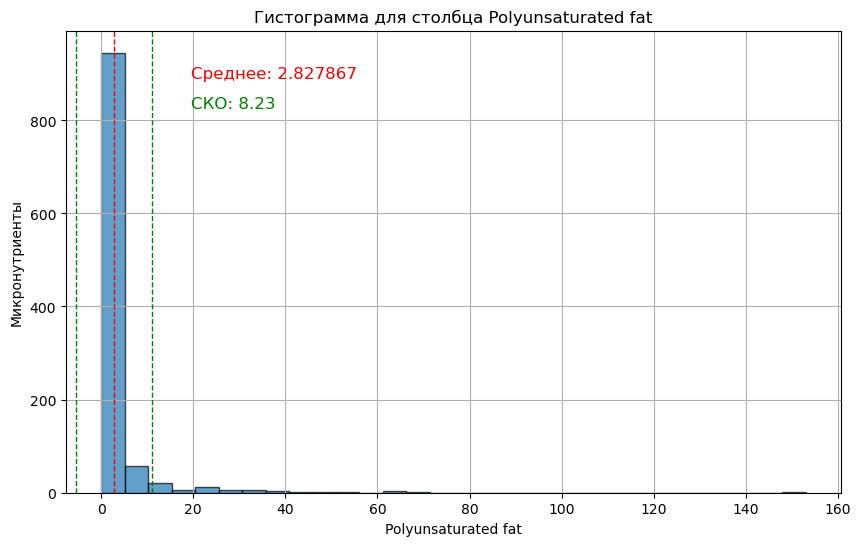

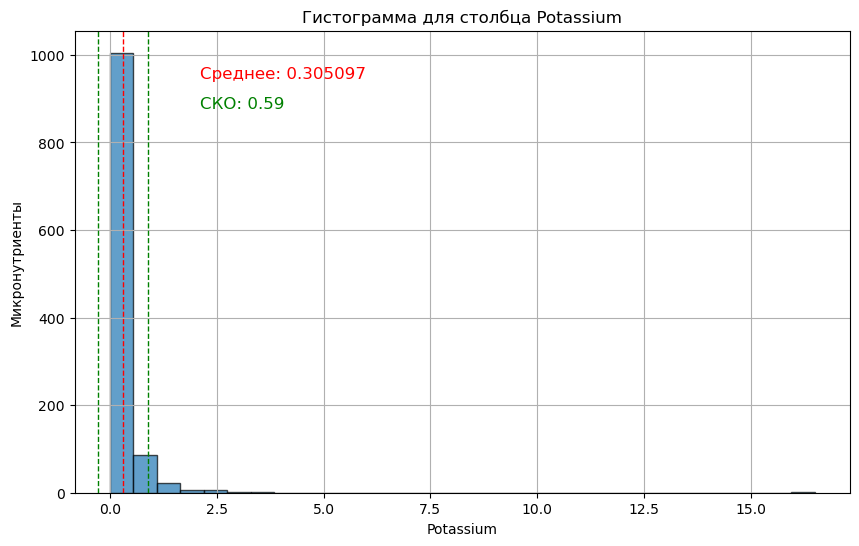

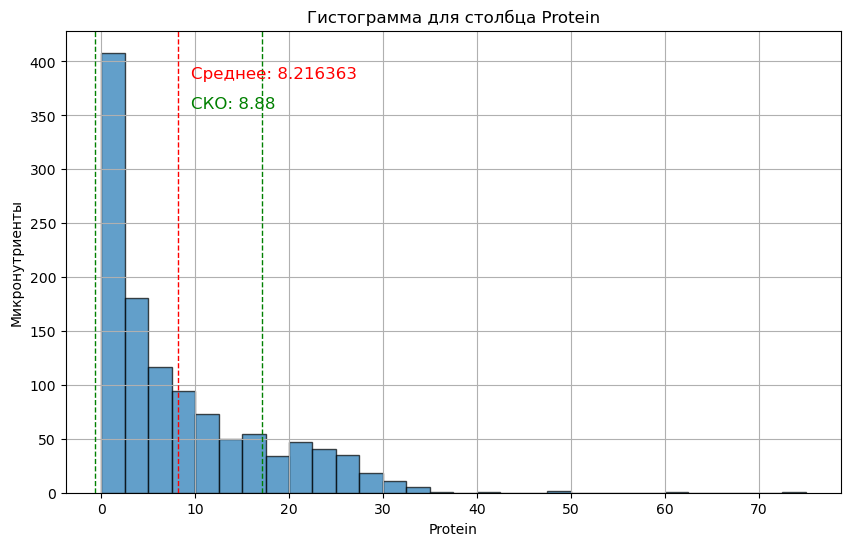

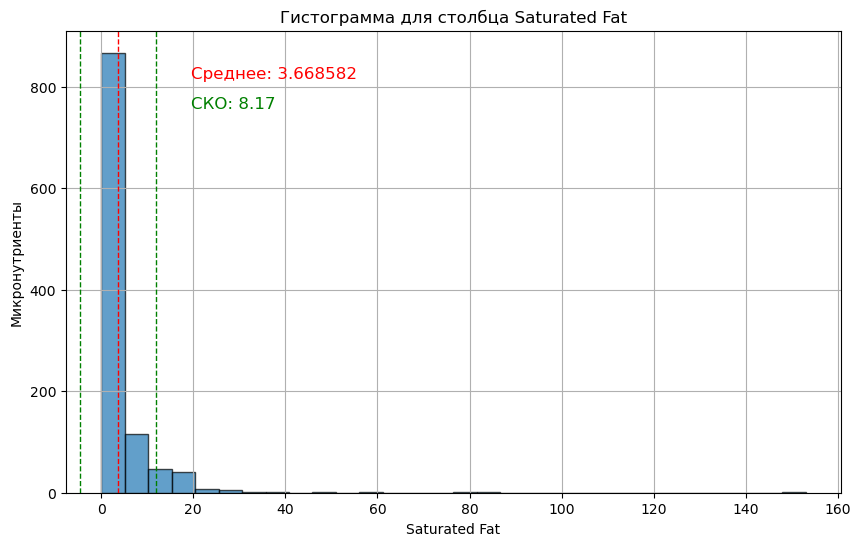

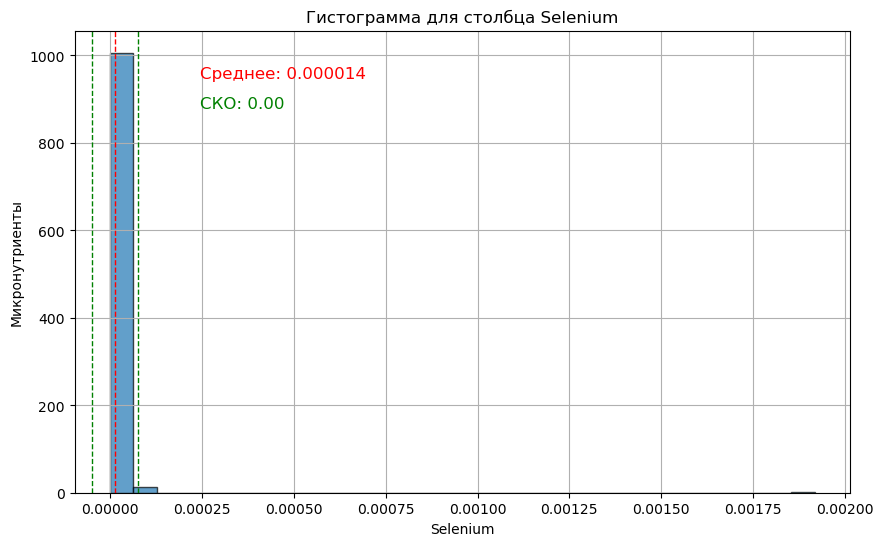

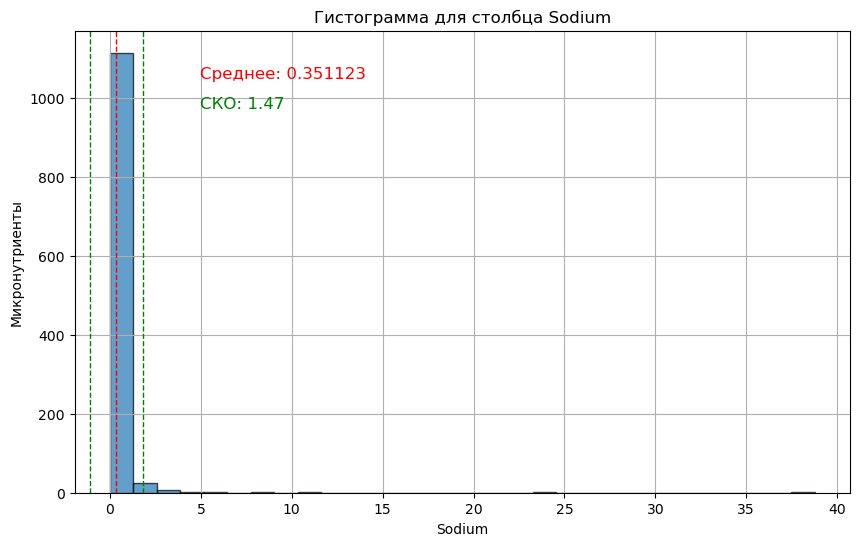

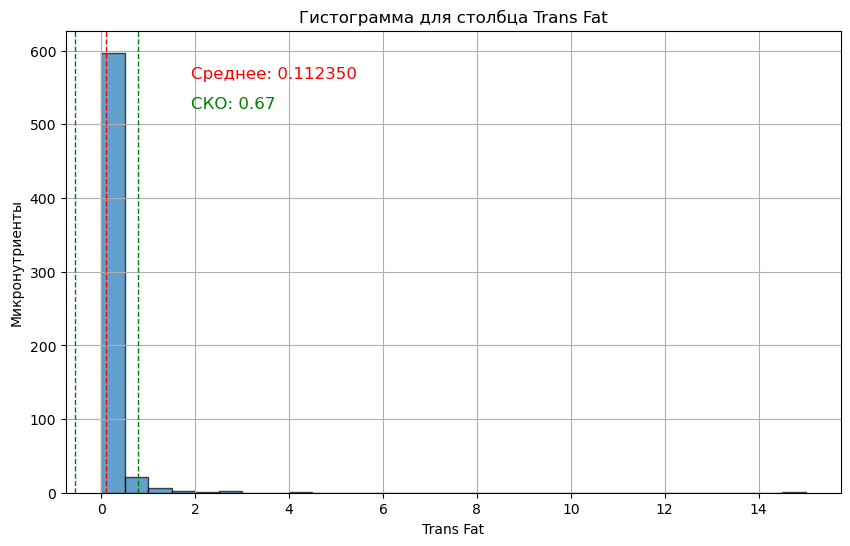

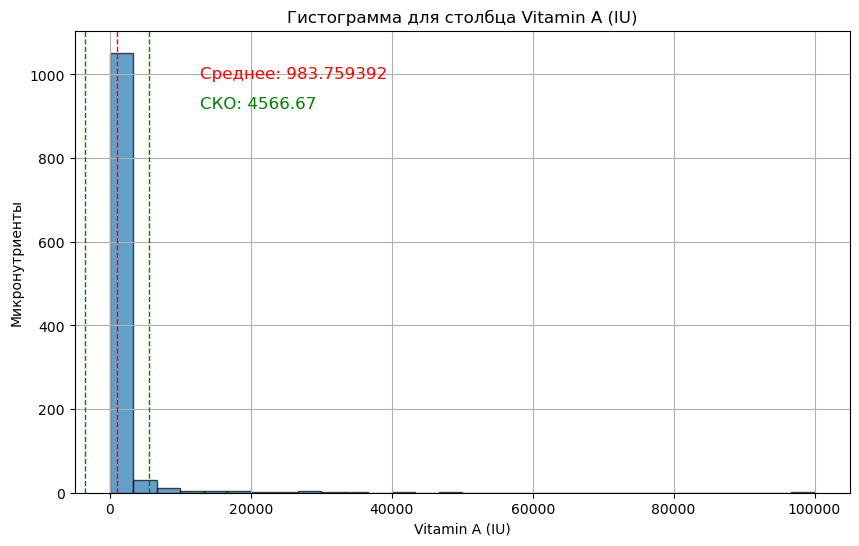

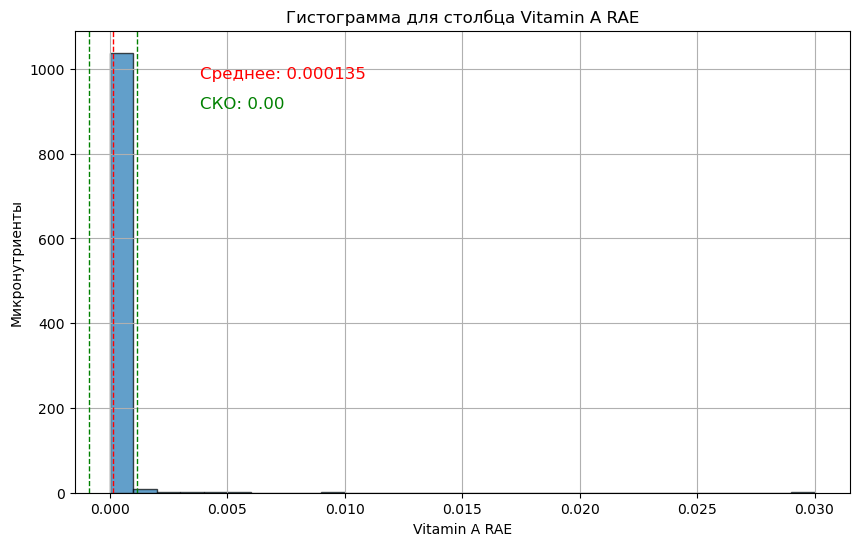

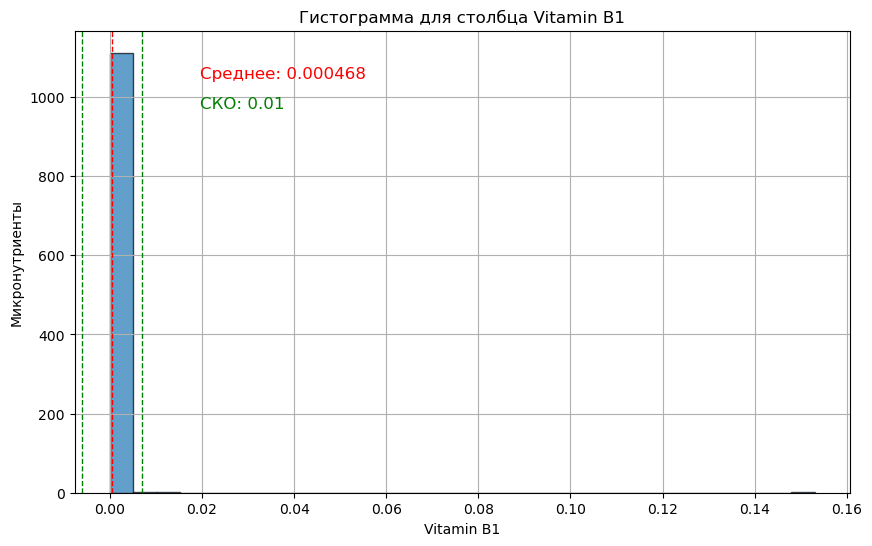

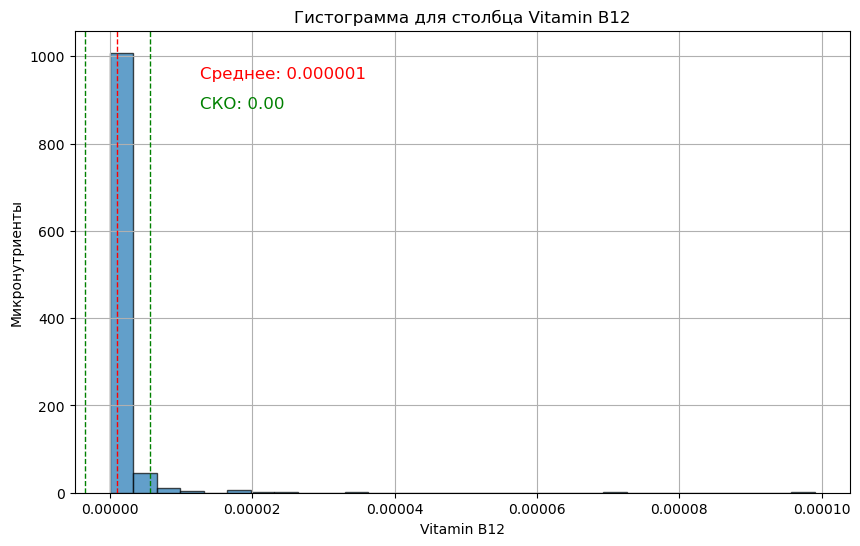

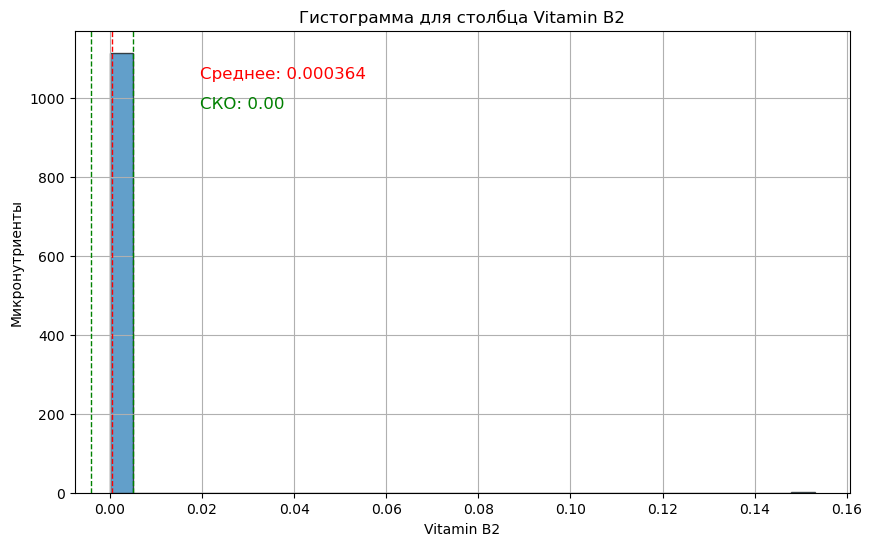

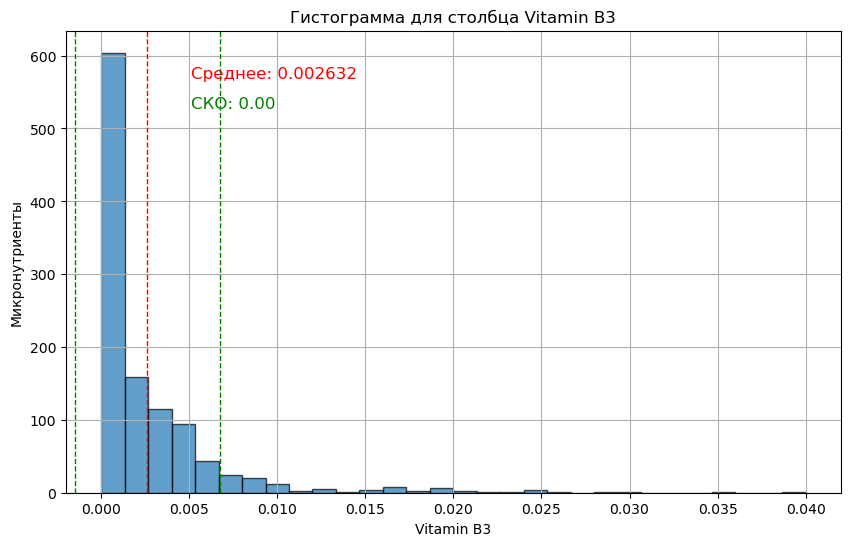

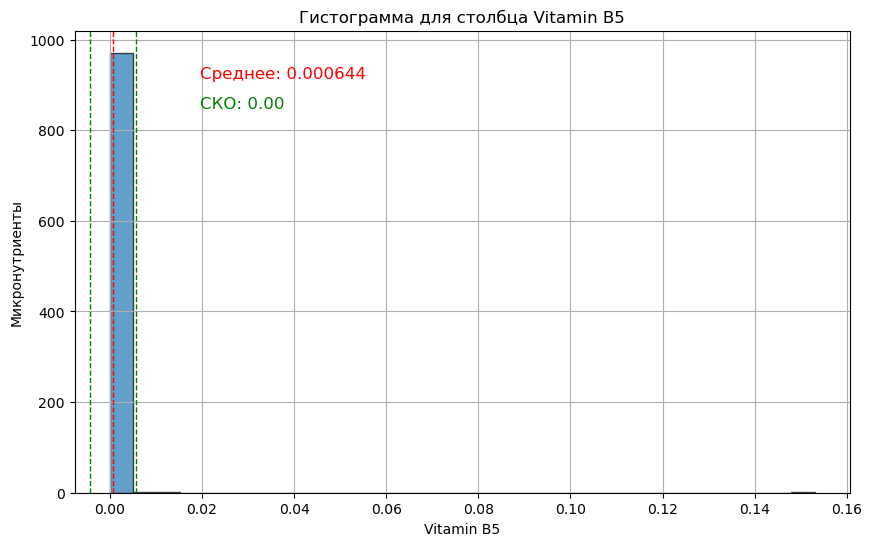

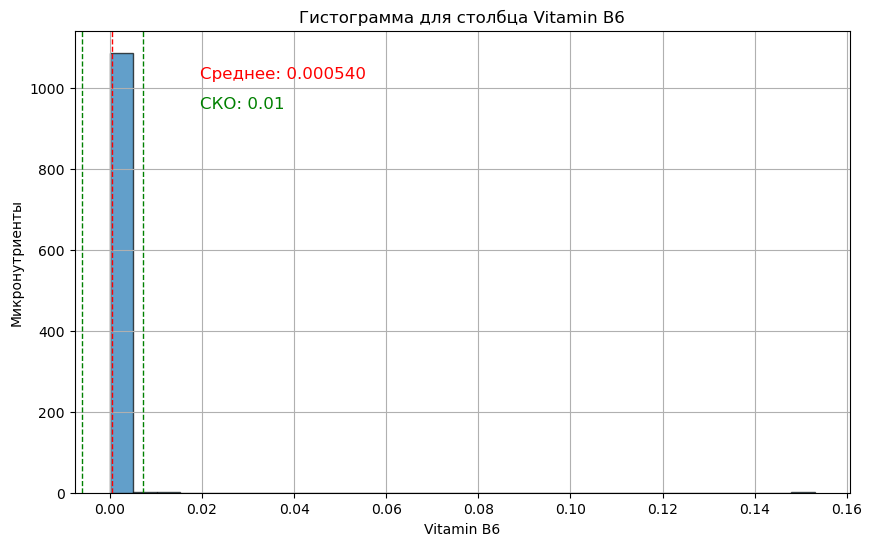

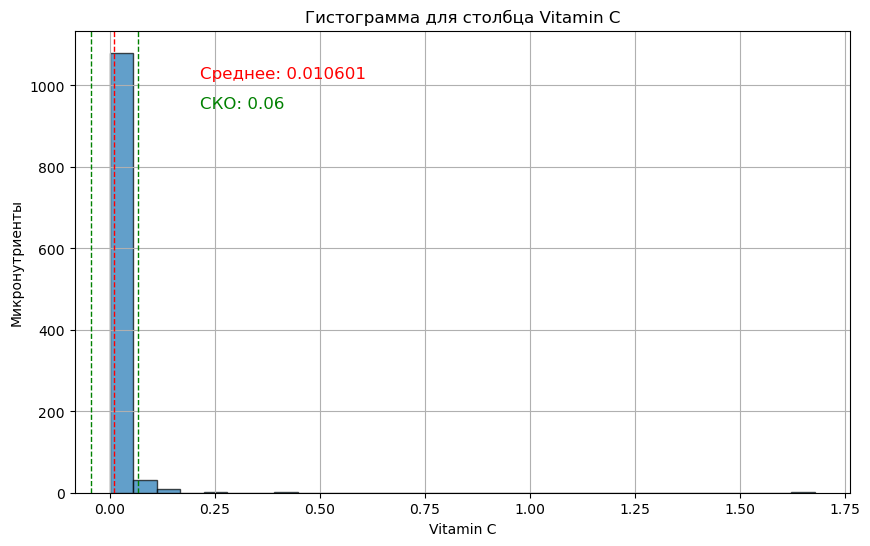

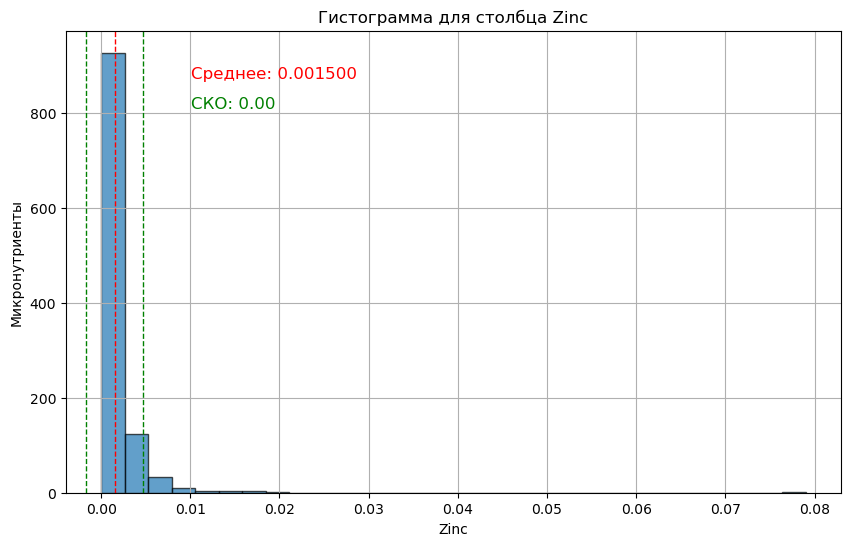

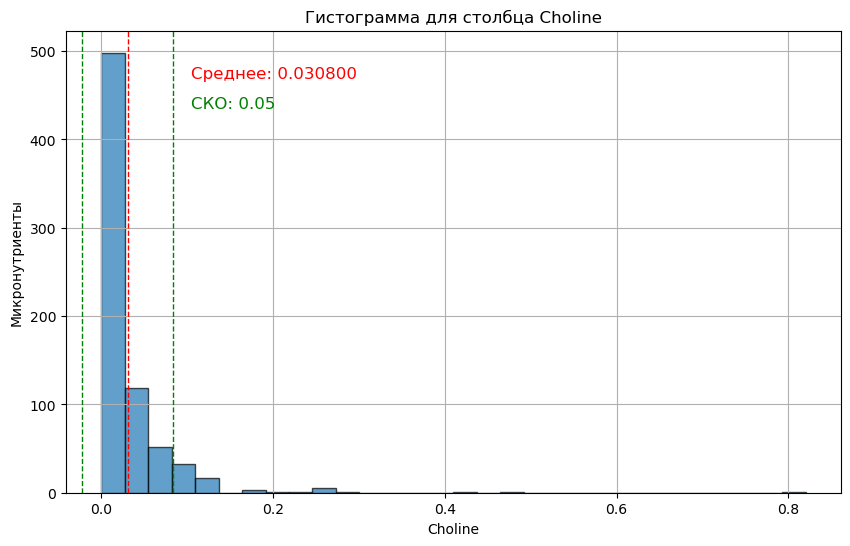

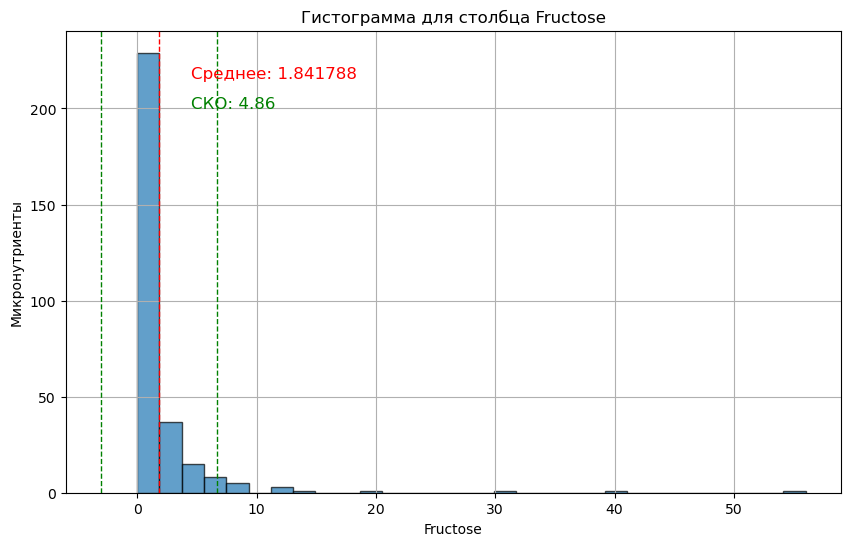

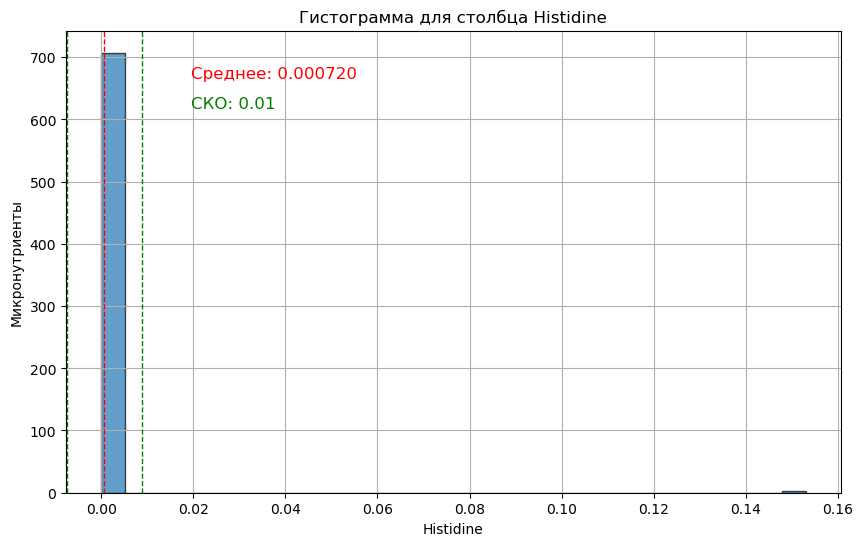

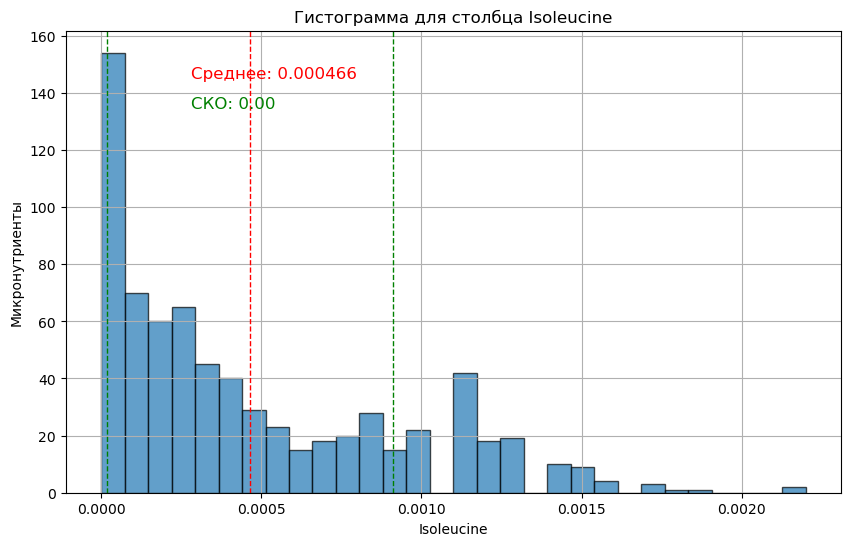

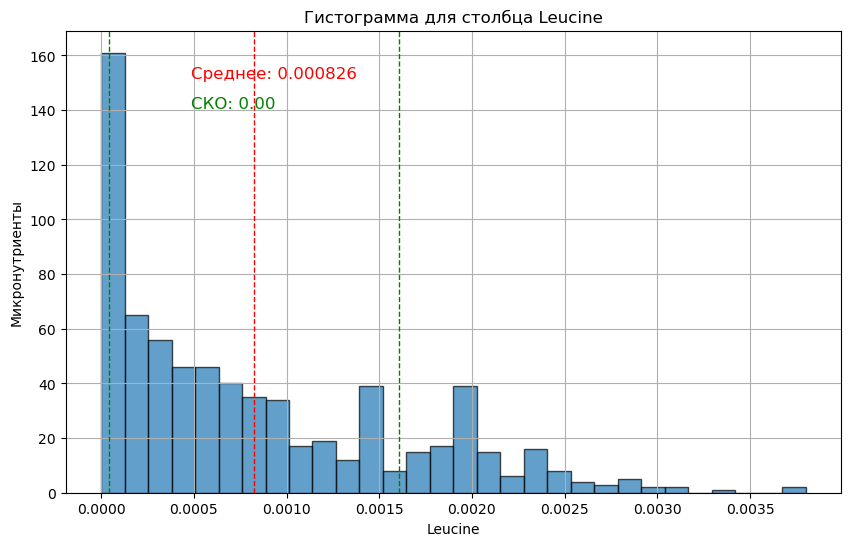

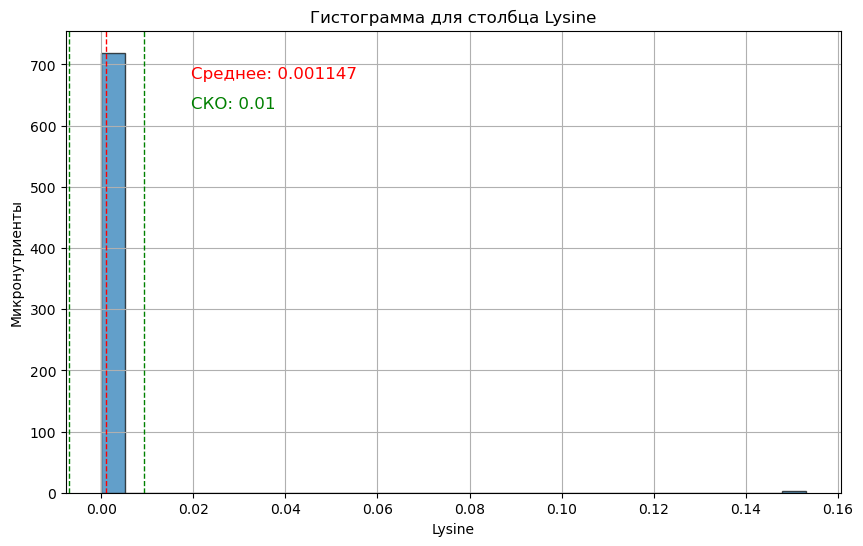

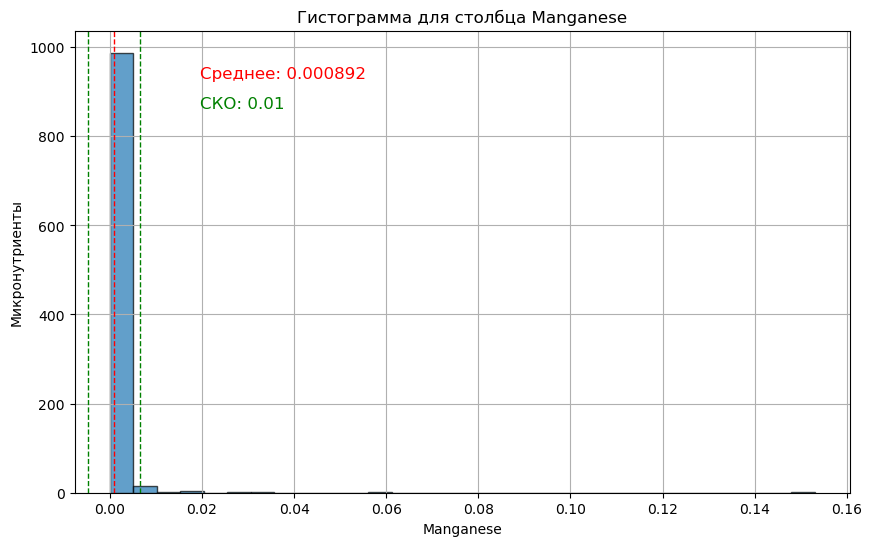

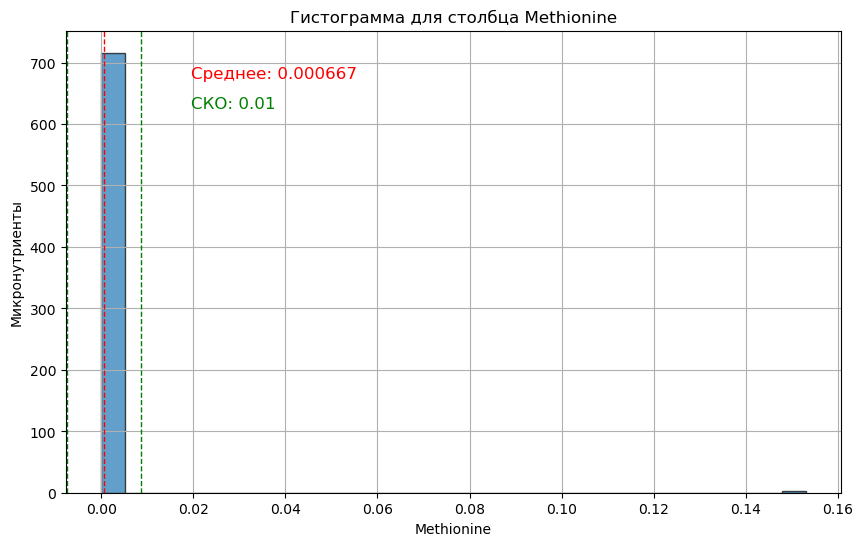

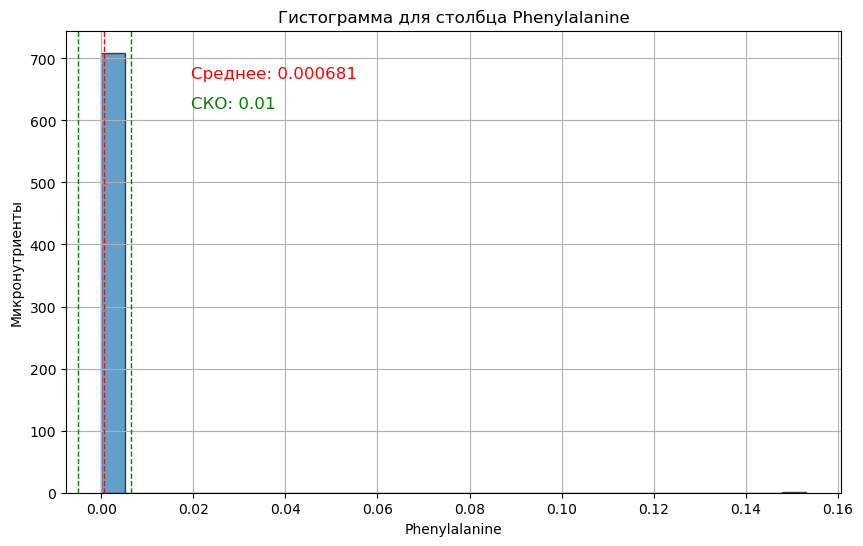

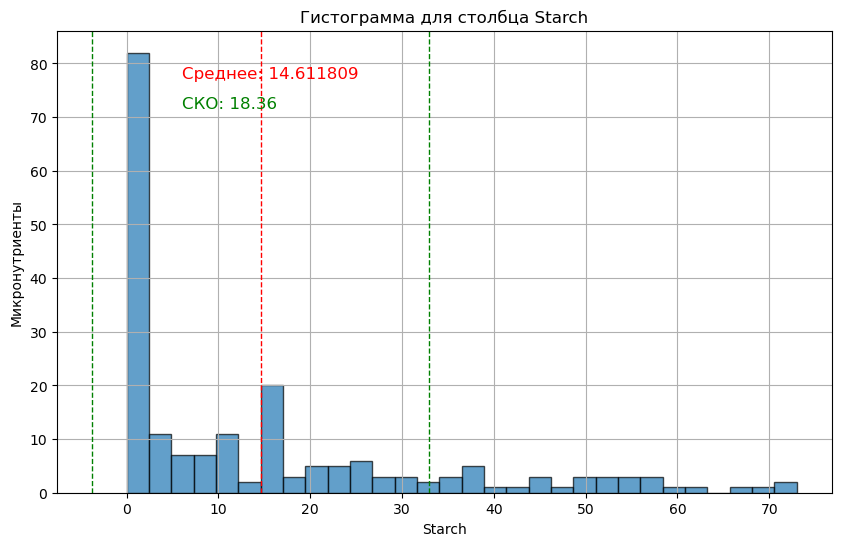

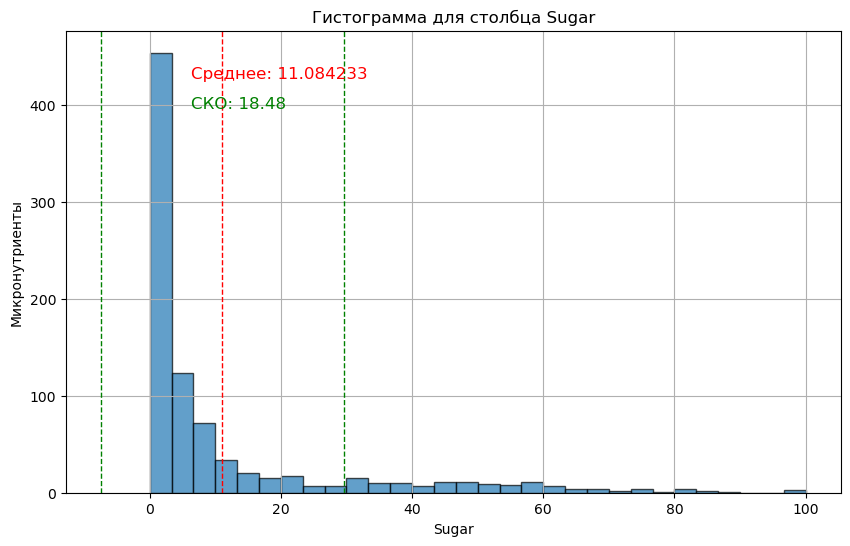

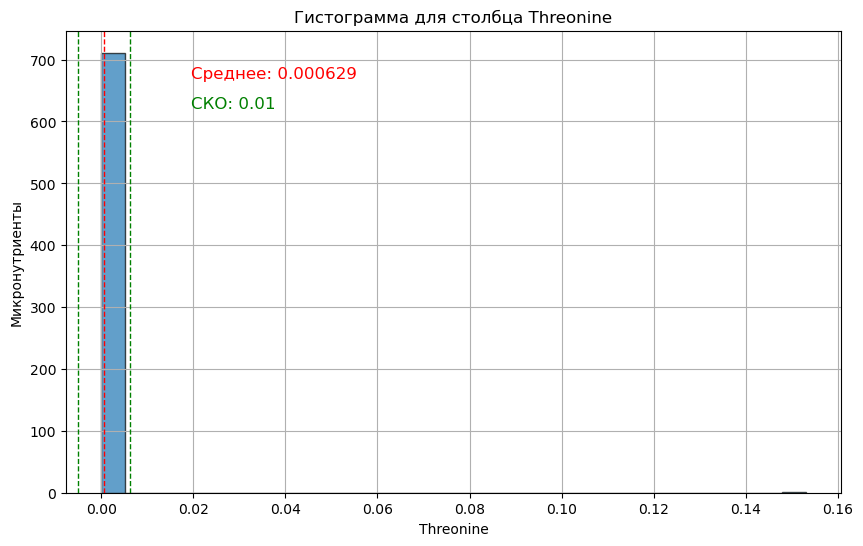

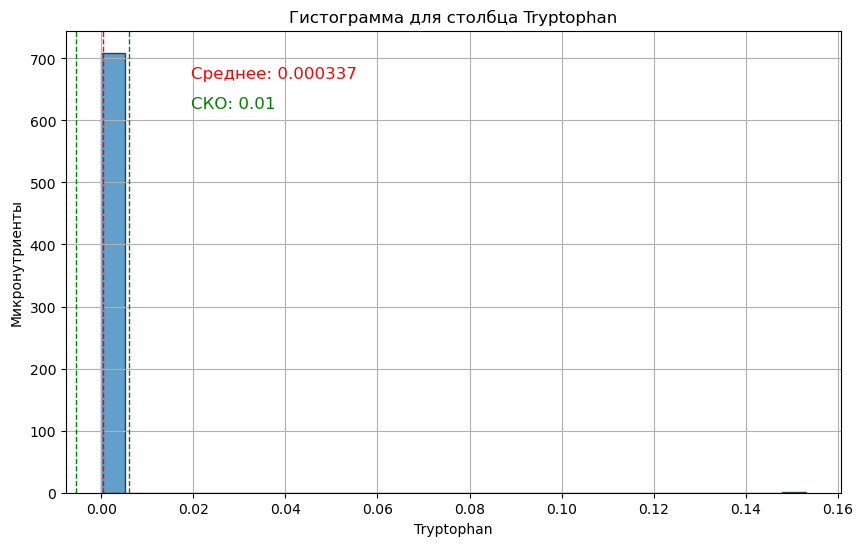

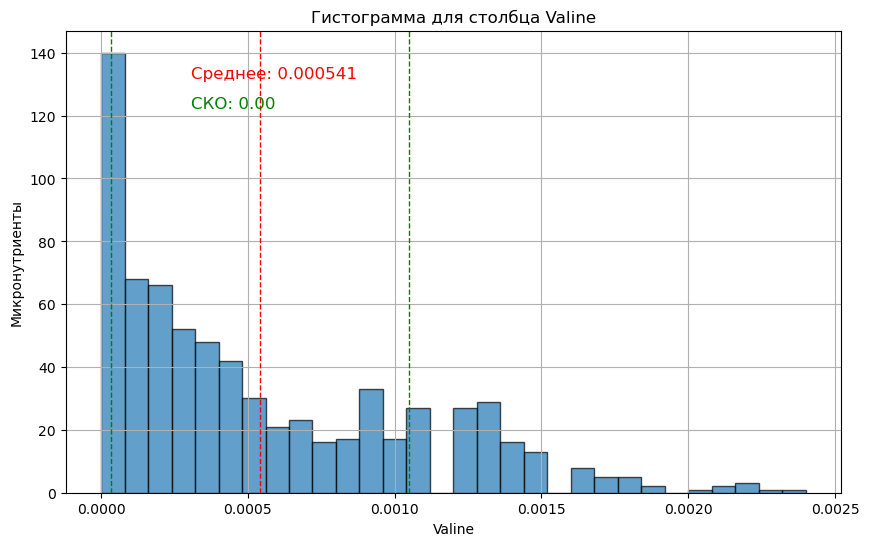

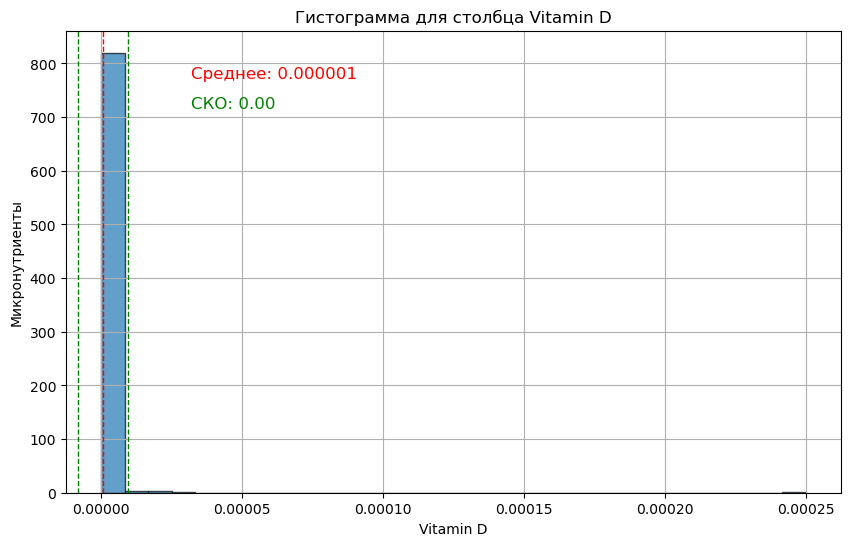

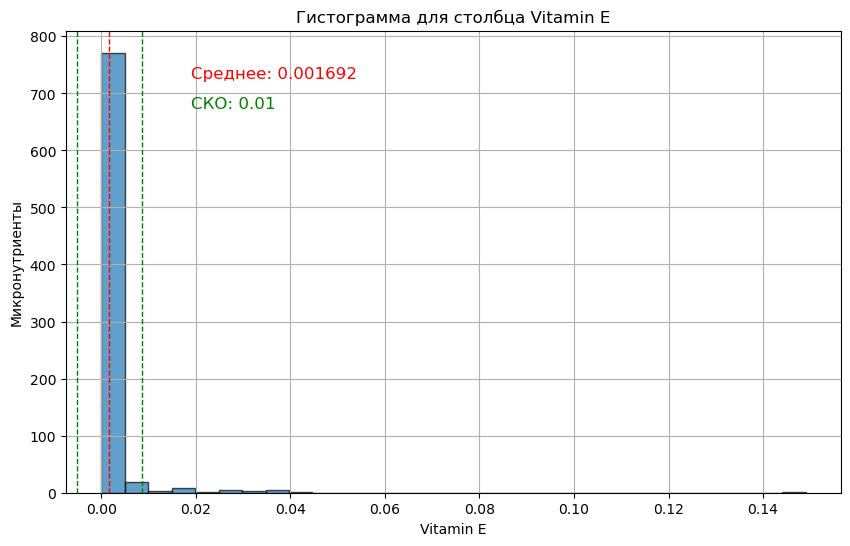

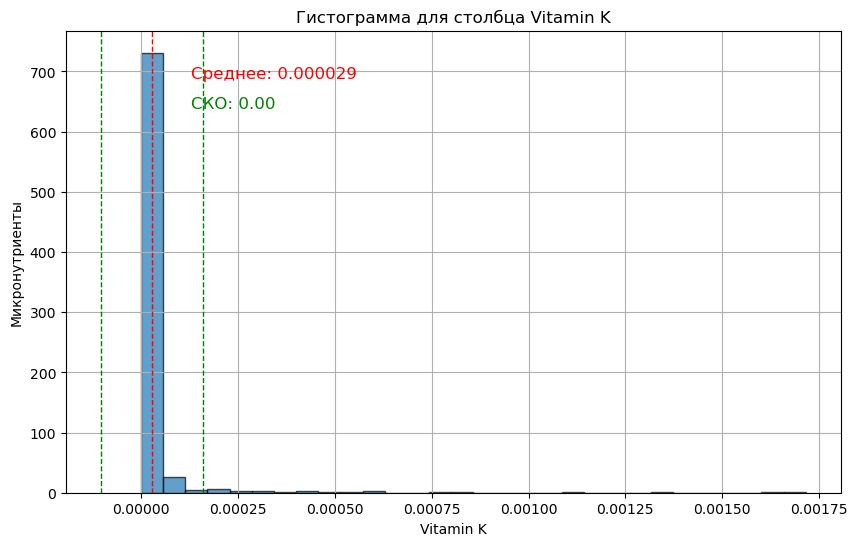

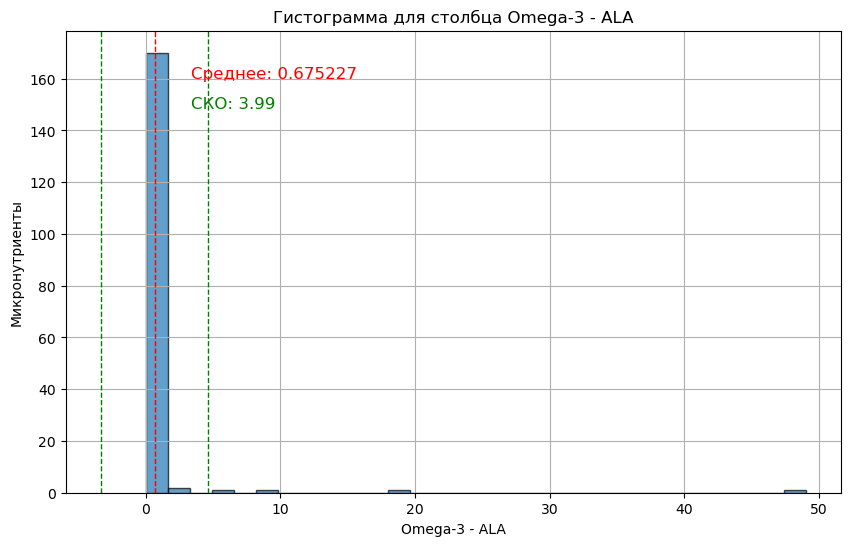

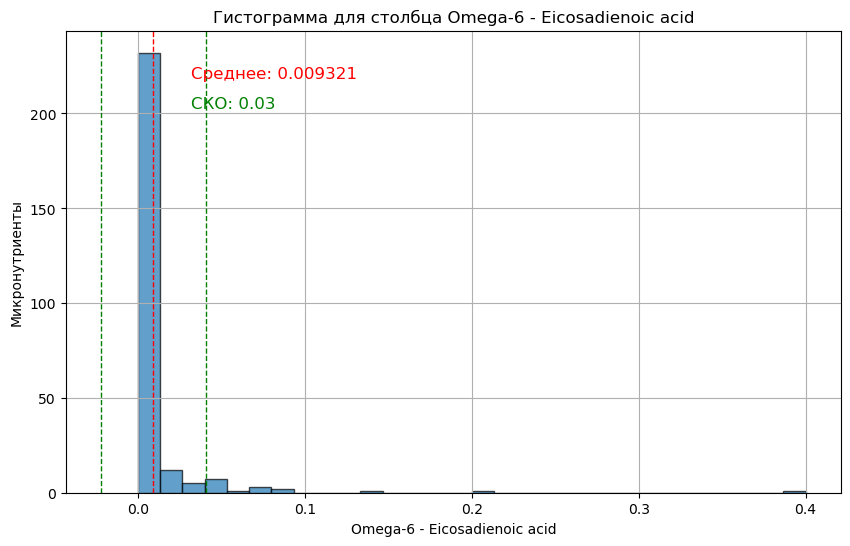

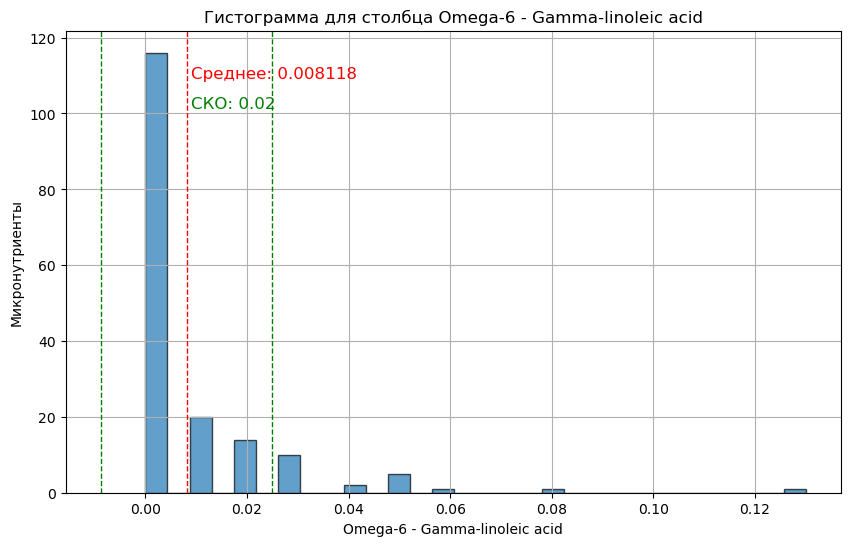

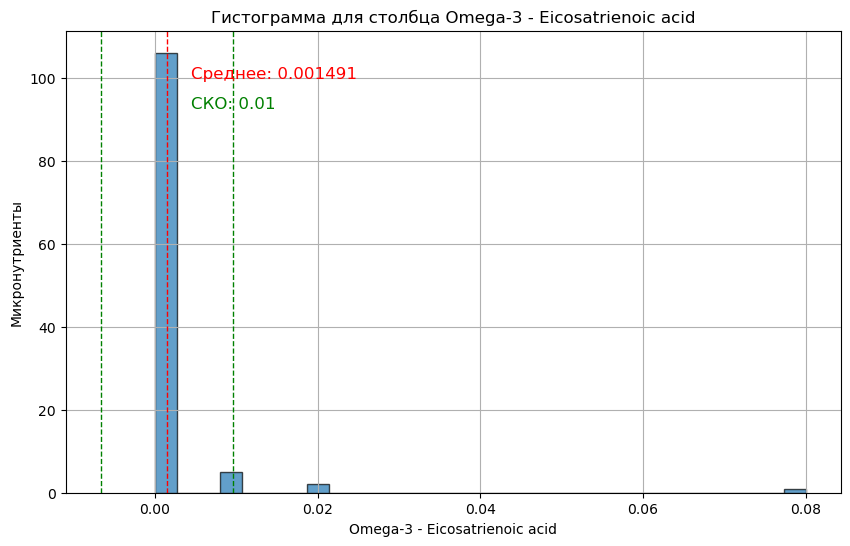

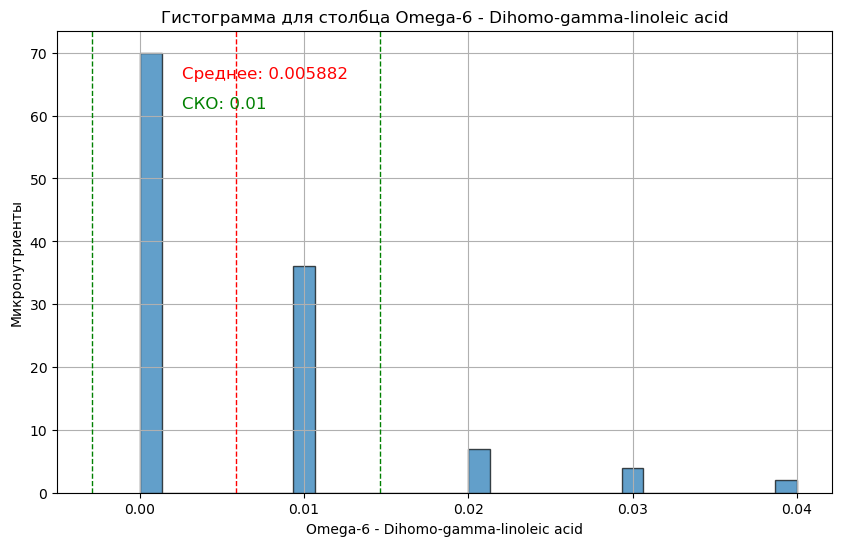

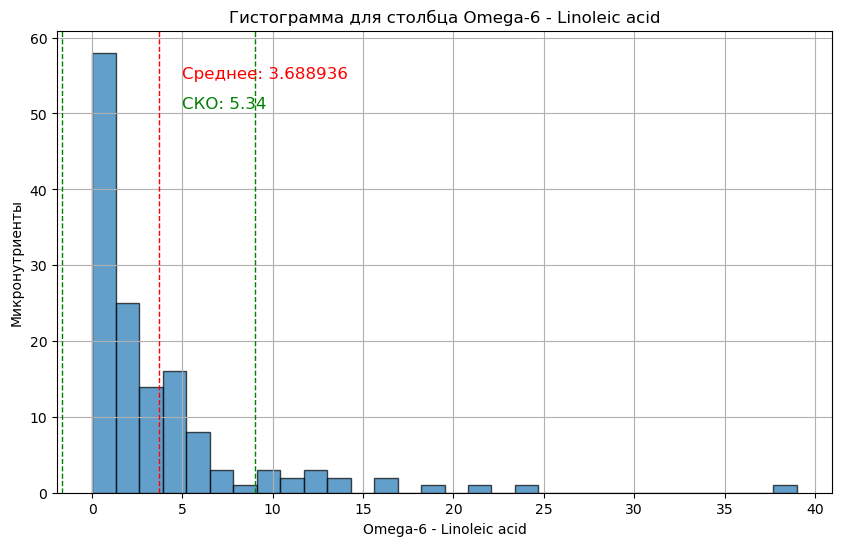

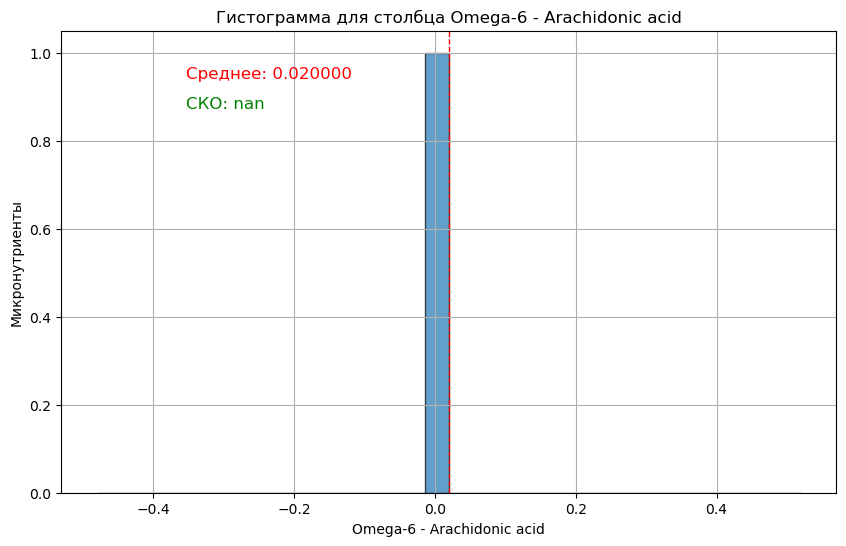

In [74]:
numeric_columns = data.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)

    mean_value = data[column].mean()
    std_dev = data[column].std()

    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value - std_dev, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value + std_dev, color='g', linestyle='dashed', linewidth=1)

    plt.title(f'Гистограмма для столбца {column}')
    plt.xlabel(column)
    plt.ylabel('Микронутриенты')
    plt.grid(True)

    plt.figtext(0.25, 0.8, f'Среднее: {mean_value:.6f}', fontsize=12, color='r')
    plt.figtext(0.25, 0.75, f'СКО: {std_dev:.2f}', fontsize=12, color='g')

    plt.show()

4. Корреляция между параметрами.

Высококореллированными являются такие атрибуты, как:
1) Калории и углеводы имеют высокую положительную корреляцию (0,43).
2) Калории и жиры имеют высокую положительную корреляцию (0,83).
3) Изолейцин и лейцин имеют высокую положительную корреляцию (0,98).

Остальные атрибуты можно считать низкокоррелированными или вовсе не коррелированными.

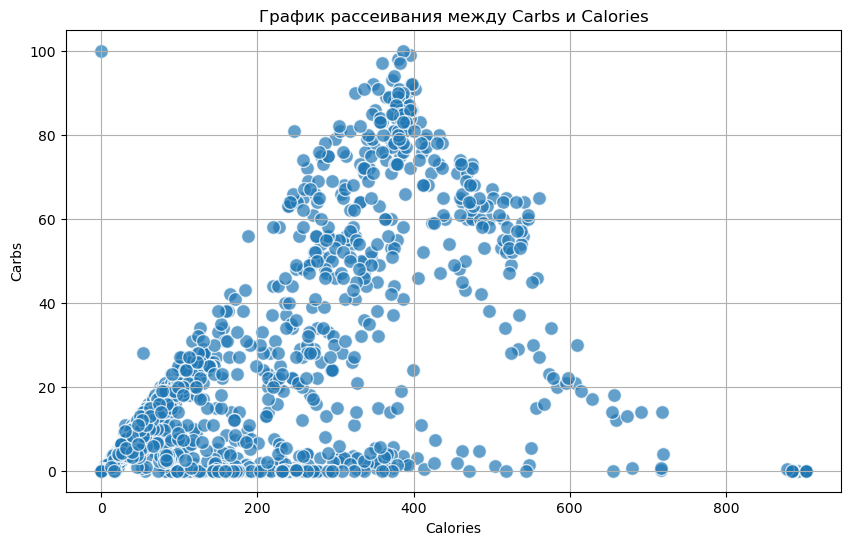

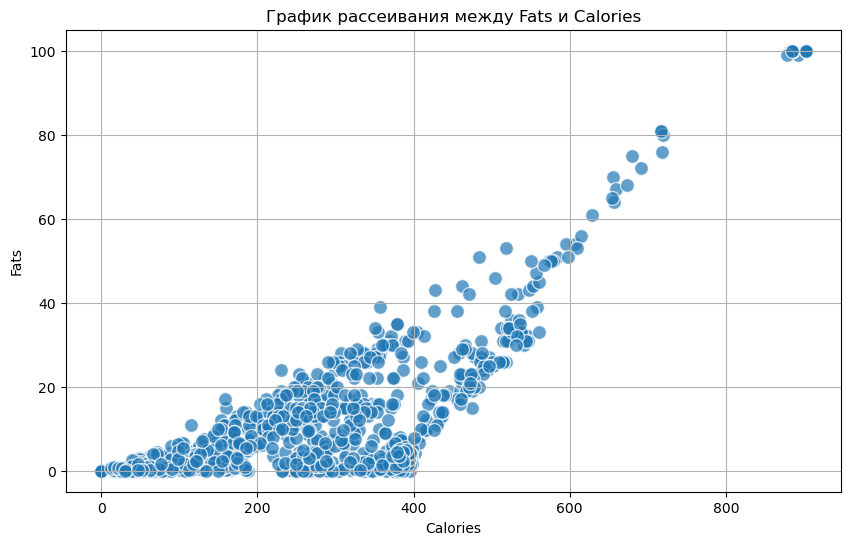

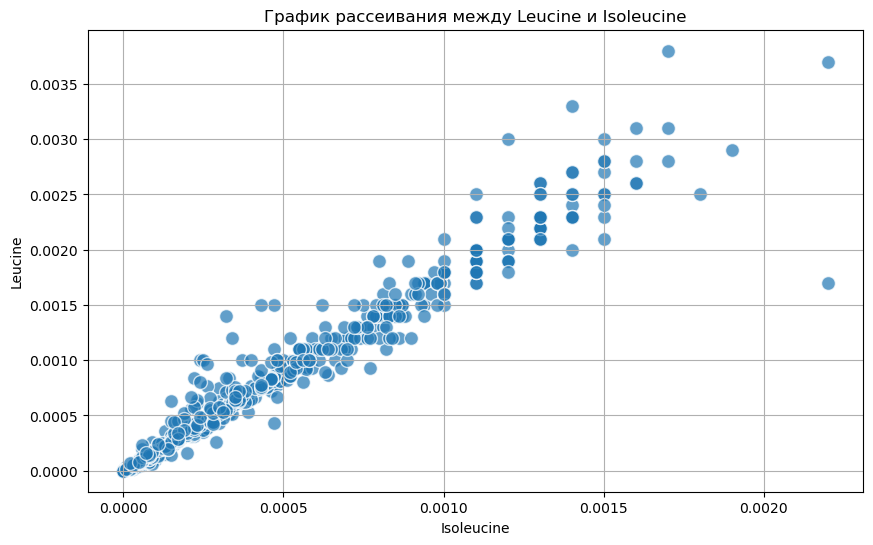

In [77]:
if 'Carbs' not in data.columns or 'Calories' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Carbs' и 'Calories'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Calories'], data['Carbs'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Carbs и Calories')
plt.xlabel('Calories')
plt.ylabel('Carbs')
plt.grid(True)
plt.show()

if 'Fats' not in data.columns or 'Calories' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Fats' и 'Calories'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Calories'], data['Fats'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Fats и Calories')
plt.xlabel('Calories')
plt.ylabel('Fats')
plt.grid(True)
plt.show()

if 'Leucine' not in data.columns or 'Isoleucine' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Leucine' и 'Isoleucine'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Isoleucine'], data['Leucine'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Leucine и Isoleucine')
plt.xlabel('Isoleucine')
plt.ylabel('Leucine')
plt.grid(True)
plt.show()